<a href="https://colab.research.google.com/github/Ayyonomit/CODSOFT/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

In [38]:
# Set random seed for reproducibility
np.random.seed(42)

# **1. Data Loading**

In [39]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [40]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Data Exploration**

In [41]:
# 2. Detailed Data Exploration
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

In [42]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [43]:
# Class distribution
print("\nClass Distribution (0: Genuine, 1: Fraud):")
print(df['Class'].value_counts())
print("\nClass Distribution (Percentage):")
print(df['Class'].value_counts(normalize=True) * 100)


Class Distribution (0: Genuine, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (Percentage):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


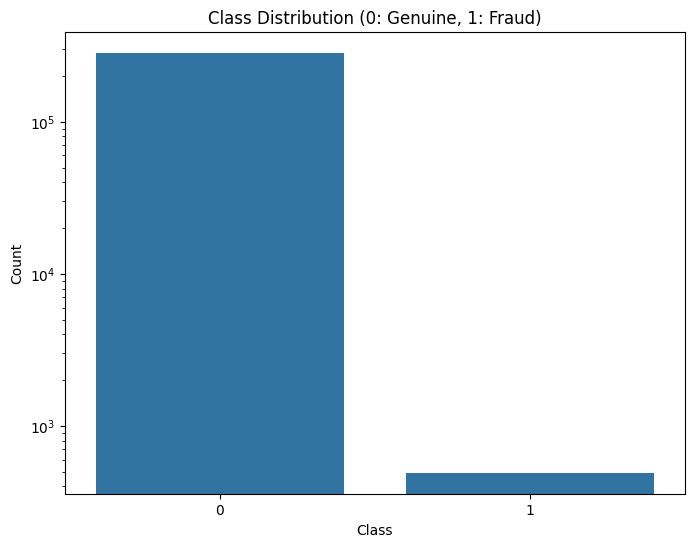

In [44]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Genuine, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')  # Log scale to better visualize imbalanced classes
plt.show()

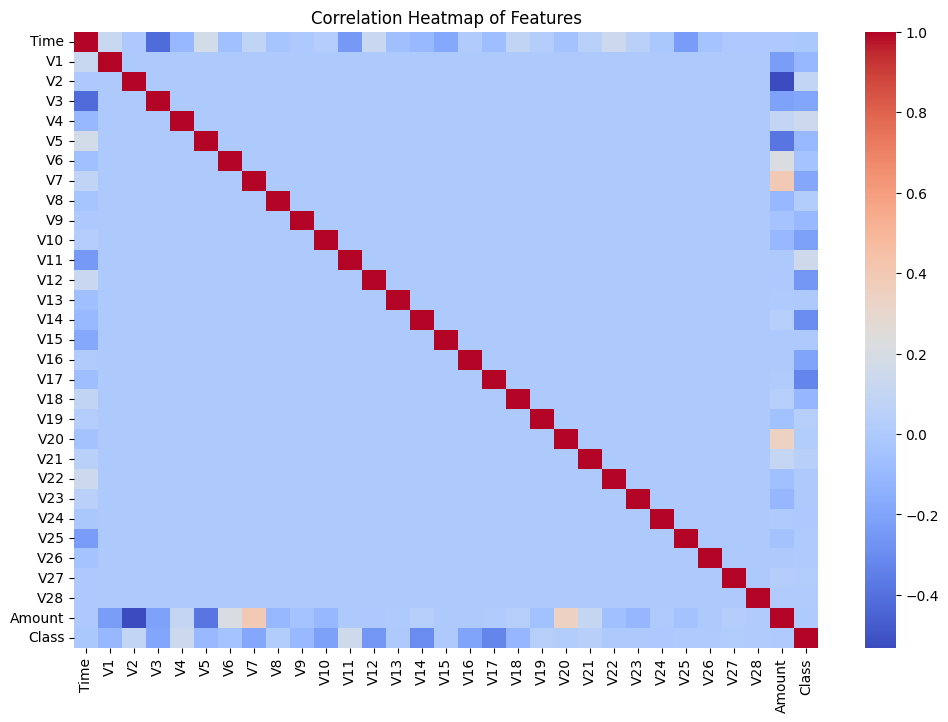

In [45]:
# Correlation analysis (for top features)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

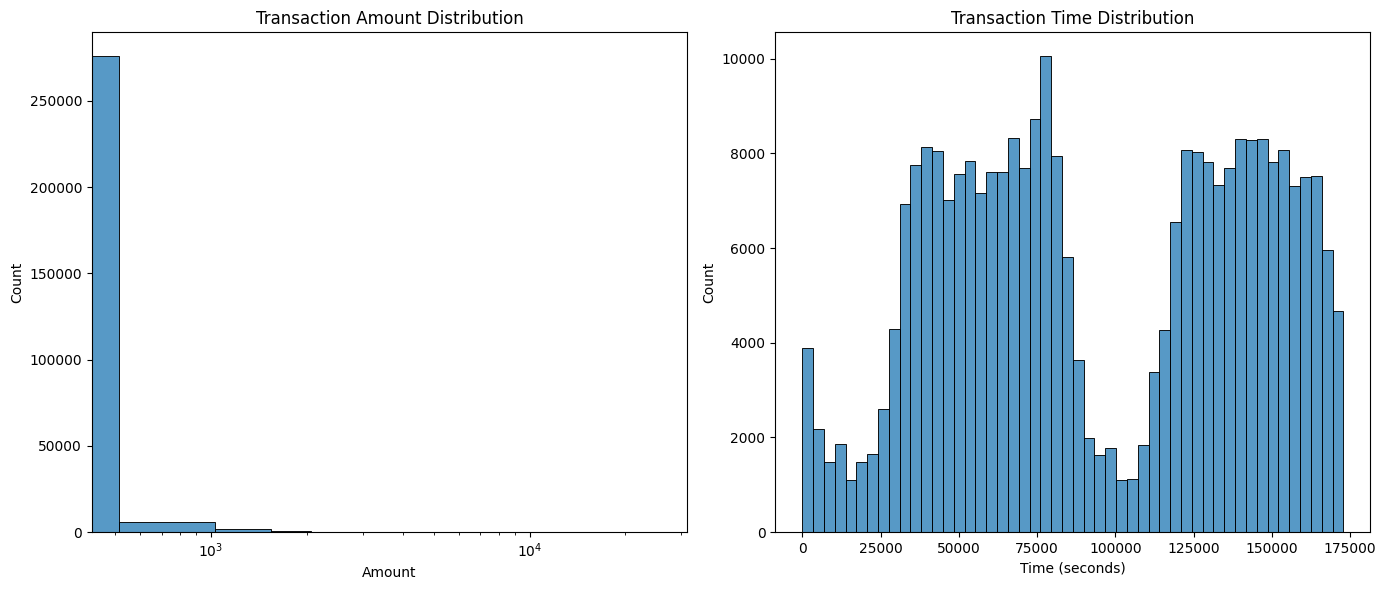

In [46]:
# Distribution of Amount and Time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Amount'], bins=50, ax=ax1)
ax1.set_title('Transaction Amount Distribution')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Count')
ax1.set_xscale('log')  # Log scale for Amount due to skewness

sns.histplot(df['Time'], bins=50, ax=ax2)
ax2.set_title('Transaction Time Distribution')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

**3. Data Preprocessing**

In [47]:
# 3. Preprocess the data
# Handle missing values
# Option 1: Drop rows with missing values (if few)
df = df.dropna()

In [48]:
# Verify no missing values remain
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [49]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [50]:
# Ensure y is of integer type (0 or 1)
y = y.astype(int)

In [51]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [52]:
# 4. Handle class imbalance using SMOTE
try:
    smote = SMOTE(random_state=42, sampling_strategy='minority')
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
except ValueError as e:
    print("Error in SMOTE:", e)
    print("Please check for NaN or infinite values in X_scaled or y")
    # Additional check for NaN or infinite values
    print("\nNaN in X_scaled:", np.any(np.isnan(X_scaled)))
    print("Infinite in X_scaled:", np.any(np.isinf(X_scaled)))
    print("NaN in y:", np.any(np.isnan(y)))
    exit()

In [53]:
# Convert back to DataFrame/Series
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled)


In [54]:
# Class distribution after SMOTE
print("\nClass Distribution after SMOTE:")
print(y_resampled.value_counts())
print("\nClass Distribution after SMOTE (Percentage):")
print(y_resampled.value_counts(normalize=True) * 100)



Class Distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64

Class Distribution after SMOTE (Percentage):
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


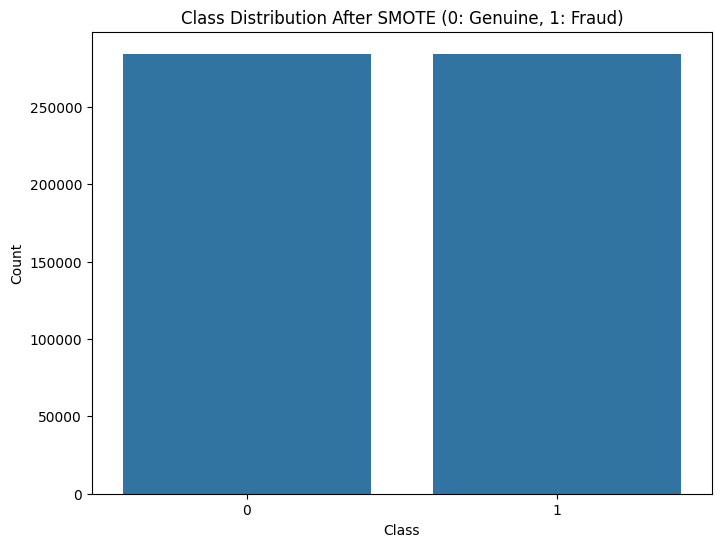

In [55]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE (0: Genuine, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**4. Data Splitting**

In [56]:
# 5. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (454904, 30)
Testing set shape: (113726, 30)


**5. Model Training**

In [57]:
# 6. Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

**6. Model Prediction**

In [58]:
# 7. Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

**7. Model Evaluation**

In [59]:
# 8. Evaluate the model
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[56849    14]
 [    0 56863]]


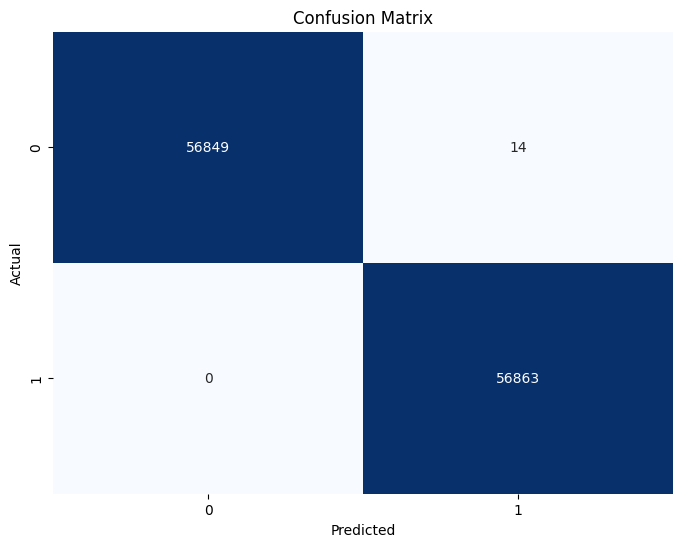


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


ROC AUC Score:
0.9999994065072235


In [60]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

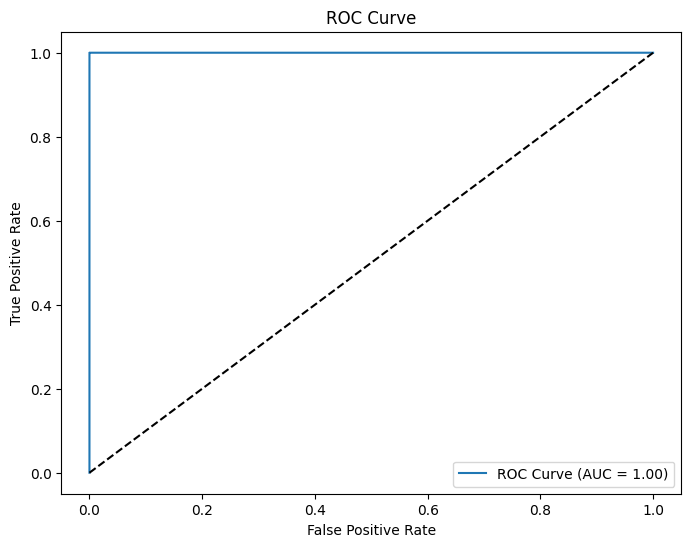

In [61]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


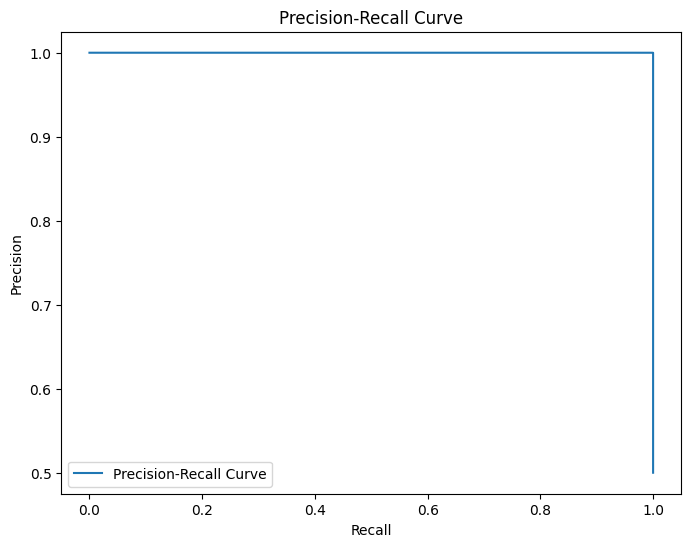

In [62]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

**8. Feature Importance Analysis**

In [63]:
# 9. Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

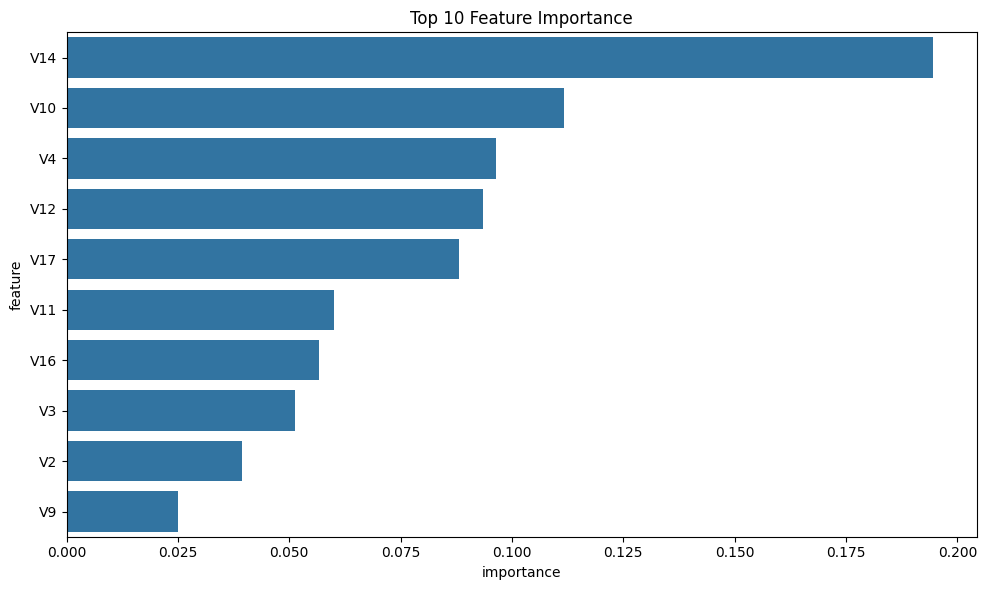

In [64]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

In [65]:
# 10. Save the model
joblib.dump(rf_model, 'enhanced_fraud_detection_model.pkl')
print("\nModel saved as 'enhanced_fraud_detection_model.pkl'")


Model saved as 'enhanced_fraud_detection_model.pkl'
